In [144]:
!pip3 install matplotlib --upgrade

In [145]:
!pip install neo4jupyter

In [1]:
pip install neo4j

Note: you may need to restart the kernel to use updated packages.


In [15]:
#Importing the cleansed SDN Intrusion Detection File
df = pd.read_csv('/Users/sindhuvaddi/Downloads/SDN_Intrusion/5_Database_Creation_and_load/Cleansed_SDN_intrusion.csv')

In [1]:
#Import Matplotlib, Seaborn and Pandas packages
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns   
import pandas as pd
import neo4jupyter
from py2neo import Graph
from pandas import DataFrame

In [2]:
from neo4j import __version__ as neo4j_version
print(neo4j_version)

4.4.2


In [3]:
from neo4j import GraphDatabase
class Neo4jConnection:
    
    def __init__(self, uri, user, pwd):
        self.__uri = uri
        self.__user = user
        self.__pwd = pwd
        self.__driver = None
        try:
            self.__driver = GraphDatabase.driver(self.__uri, auth=(self.__user, self.__pwd))
        except Exception as e:
            print("Failed to create the driver:", e)
        
    def close(self):
        if self.__driver is not None:
            self.__driver.close()
        
    def query(self, query, db=None):
        assert self.__driver is not None, "Driver not initialized!"
        session = None
        response = None
        try: 
            session = self.__driver.session(database=db) if db is not None else self.__driver.session() 
            response = list(session.run(query))
        except Exception as e:
            print("Query failed:", e)
        finally: 
            if session is not None:
                session.close()
        return response

In [4]:
conn = Neo4jConnection(uri="bolt://localhost:7687", user="neo4j", pwd="654321")
print(conn)

In [5]:
query1 = '''
MATCH (IntrusionId)-[:DIVIDE_INTO]->(Class)
RETURN IntrusionId.IntrusionId as IntrusionId, Class.Class as Class
''' 
data1 = DataFrame([dict(_) for _ in conn.query(query1, db='neo4j')])

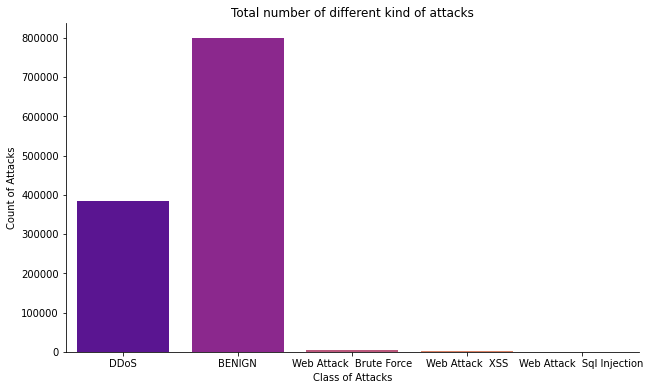

In [6]:
#1.To Calculate the total number of different kind of attacks. 

viz_1 = sns.catplot(x = "Class", y = None, kind='count', palette = 'plasma', data=data1, height=8, aspect=1.5)
viz_1.set(title = 'Total number of different kind of attacks', xlabel=('Class of Attacks'), ylabel = ('Count of Attacks'))
viz_1.fig.set_size_inches(10, 6)
viz_1.fig.subplots_adjust(top=0.81, right=0.86)

In [7]:
query2_1 = '''
MATCH (Total_Fwd_Packets)-[:DIVIDE_INTO]->(Class)
RETURN Class.Class as Class, Total_Fwd_Packets.Total_Fwd_Packets as Total_Fwd_Packets

''' 
query2_2 = '''
MATCH (Total_Backward_Packets)-[:DIVIDE_INTO]->(Class)
RETURN Class.Class as Class, Total_Backward_Packets.Total_Backward_Packets as Total_Backward_Packets

''' 
data2_1 = DataFrame([dict(_) for _ in conn.query(query2_1, db='neo4j')])
data2_2 = DataFrame([dict(_) for _ in conn.query(query2_2, db='neo4j')])

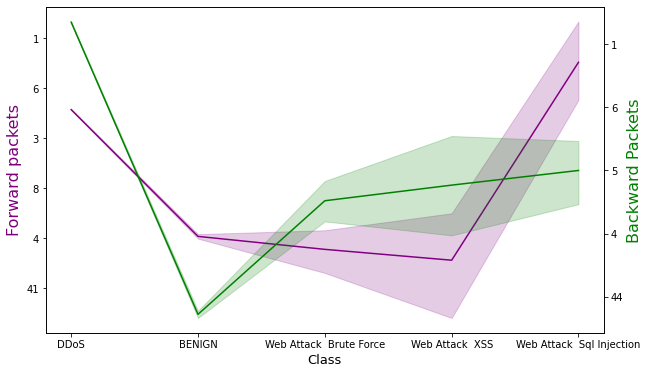

In [8]:
#2.To Calculate the average Total Forward and average Total Backward packers for different kind of attacks.

%matplotlib inline
fig, viz_t = plt.subplots(figsize=(10,6))

viz_t.set_xlabel('Class', fontsize=13)
viz_t.set_ylabel('Forward packets', fontsize=16, color='Purple') 
viz_2 = sns.lineplot(x='Class', y='Total_Fwd_Packets', data = data2_1, color = 'Purple')
#viz_t.tick_params(axis='y')
viz_2 = viz_t.twinx()

viz_2.set_ylabel('Backward Packets', fontsize=16, color='Green')
viz_2 = sns.lineplot(x='Class', y='Total_Backward_Packets', data = data2_2, color = 'Green')
#viz_2.tick_params(axis='y')
plt.show()

In [9]:
query3 = '''
MATCH (Down_Up_Ratio)-[:DIVIDE_INTO]->(Class)
RETURN Class.Class as Class, Down_Up_Ratio.Down_Up_Ratio AS Down_Up_Ratio
''' 
data3 = DataFrame([dict(_) for _ in conn.query(query3, db='neo4j')])

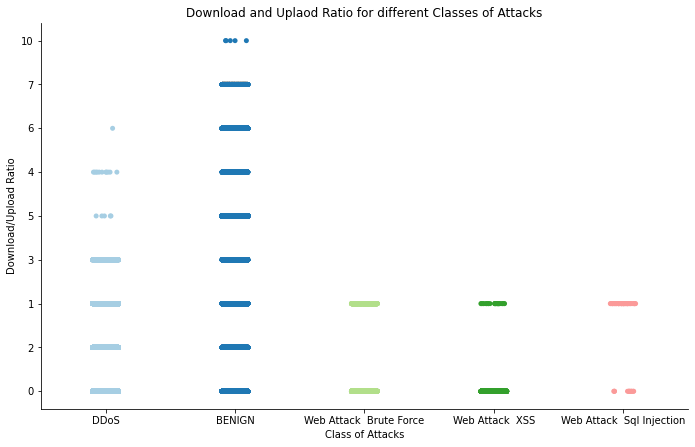

In [10]:
#3.down/up ratio categorize for diff classes

viz_3 = sns.catplot(x = "Class", y = "Down_Up_Ratio",  data = data3, aspect=1.5, palette = 'Paired')
viz_3.set(title = 'Download and Uplaod Ratio for different Classes of Attacks', xlabel=('Class of Attacks'), ylabel = ('Download/Upload Ratio'))
viz_3.fig.set_size_inches(10, 6)

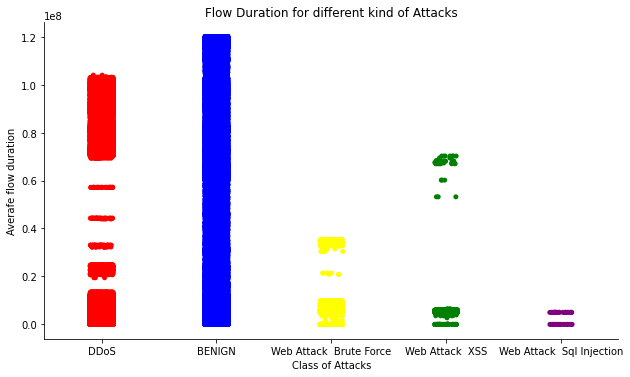

In [20]:
#4.To Calculate the average Flow Duration for different kind of attacks.

viz_4 = sns.catplot(x = "Class", y = "Flow_Duration",  data = df,  aspect=1.5)
viz_4.set(title = 'Flow Duration for different kind of Attacks', xlabel=('Class of Attacks'), ylabel=('Averafe flow duration'))
viz_4.fig.set_size_inches(10, 6)
viz_4.fig.subplots_adjust(top=0.81, right=0.86)

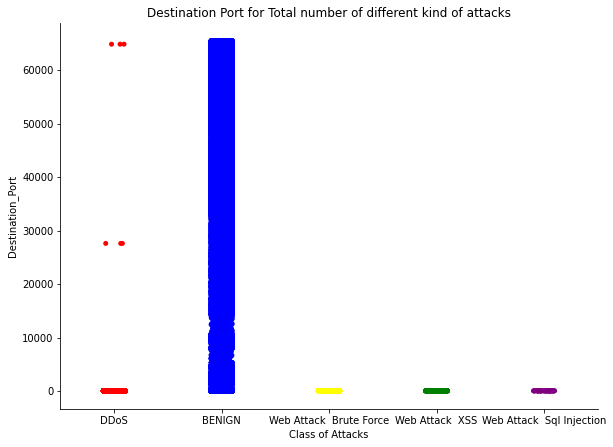

In [16]:
#5.Destination port for different classes

%matplotlib inline

color = ["Red", "Blue", "Yellow", "Green", "Purple"]
sns.set_palette(color)

viz_5 = sns.catplot(x = "Class", y = "Destination_Port",  data = df)
viz_5.set(title = 'Destination Port for Total number of different kind of attacks', xlabel=('Class of Attacks'), ylabel = ('Destination_Port'))
viz_5.fig.set_size_inches(10, 6)

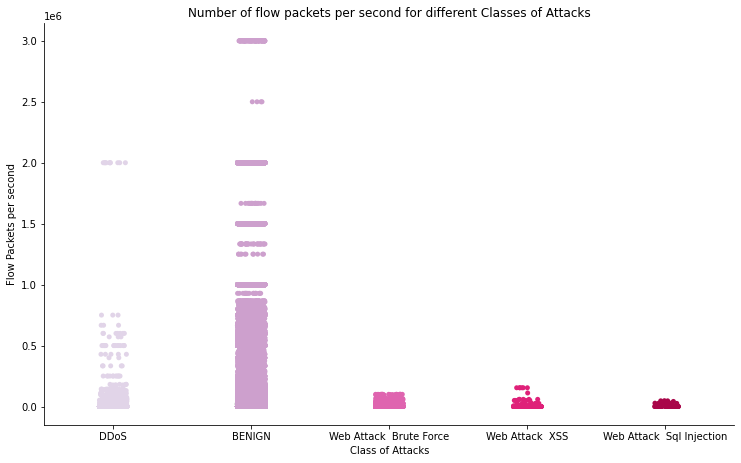

In [17]:
#6.Number of flow packets per second for diff classes

viz_6 = sns.catplot(x = "Class", y = "Flow_Packets_s",  data = df, aspect=1.5, height = 10, palette = 'PuRd')
viz_6.set(title = 'Number of flow packets per second for different Classes of Attacks', xlabel=('Class of Attacks'), ylabel = ('Flow Packets per second'))
viz_6.fig.set_size_inches(10, 6)

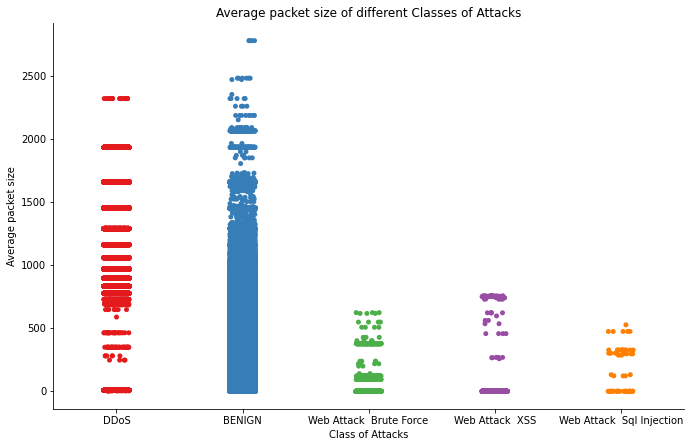

In [21]:
#7.Average packet size per second for diff classes

viz_7 = sns.catplot(x = "Class", y = "Average_Packet_Size",  data = df, aspect=1.5, palette = 'Set1')
viz_7.set(title = 'Average packet size of different Classes of Attacks', xlabel=('Class of Attacks'), ylabel = ('Average packet size'))
viz_7.fig.set_size_inches(10, 6)